<!-- ABSTRACT -->

This notebook can be used to plot learning curves for a given run, including losses, r2, learning rate schedule, and correlation coefficients.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the CSV files (from WandB)
df_val_loss = pd.read_csv('val_loss.csv')
df_train_loss = pd.read_csv('train_loss.csv')
df_r2 = pd.read_csv('r2.csv')
df_lr = pd.read_csv('lr.csv')
df_spearman = pd.read_csv('spearman.csv')
df_pearson = pd.read_csv('pearson.csv')

run_name = 'tc_54x'
epoch_steps = range(332)

In [3]:
# Support for multiple runs in parts

split_runs = ['trans_conv_54x', 'tc_54x_part_2', 'tc_54x_part_3', 'tc_54x_part_4']
break_points = [0, 81, 171, 261]

# List of (DataFrame, column suffix) tuples
metrics_info = [
    (df_val_loss, 'val_loss'),
    (df_train_loss, 'train_loss'),
    (df_r2, 'r^2'),
    (df_lr, 'lr'),
    (df_spearman, 'spearman'),
    (df_pearson, 'pearson'),
]

for df, col_suffix in metrics_info:
    
    agg_metric = np.full(len(df), np.nan)
    
    for i, (run, start) in enumerate(zip(split_runs, break_points)):
        end = break_points[i + 1] if i + 1 < len(break_points) else len(df)
        col_name = f"{run} - {col_suffix}"
        agg_metric[start:end] = df[col_name].iloc[start:end]
    
    df[f'{run_name} - {col_suffix}'] = agg_metric

### Style 1: Side by Side

In [ ]:
# Set the font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=False)

# Plot for Validation Loss and R^2 on the left
line1 = ax1.plot(epoch_steps, df_val_loss[run_name + ' - val_loss'], label='Validation loss', color='b')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Validation loss', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis for R^2
ax1_twin = ax1.twinx()
line2 = ax1_twin.plot(epoch_steps, df_r2[run_name + ' - r^2'], label=r"$R^2$", color='g')
ax1_twin.set_ylabel(r"$R^2$", color='g')
ax1_twin.set_ylim(0, 0.8)  # Set y-axis limits for R squared
ax1_twin.tick_params(axis='y', labelcolor='g')

# Combine handles and labels for a single legend
lines = line1 + line2
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper right', bbox_to_anchor=(0.9, 0.9))

# Set x-axis limits
ax1.set_xlim(0, 800)

# Plot for Learning Rate on the right
ax2.plot(epoch_steps, df_lr[run_name + ' - lr'], label='Learning rate', color='purple')
ax2.set_xlim(0, 800)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Learning rate', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.spines['left'].set_color('purple')  # Change the color of the y-axis spine

# Add legend to the right plot
ax2.legend(loc='upper right', bbox_to_anchor=(0.95, 0.95))

# Save the figure
plt.tight_layout()  # Adjust the layout
plt.savefig('combined_plot.png', dpi=500, bbox_inches='tight')  # Save as a high-resolution image

# Show the plot
plt.show()

### Style 2: Separate, with Spearman and Pearson Correlation Coefficients

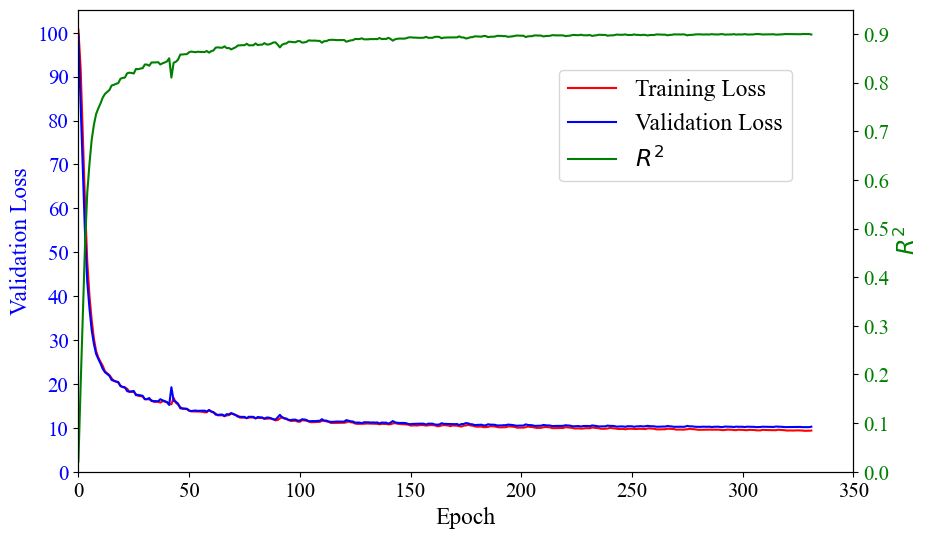

In [4]:
# Set the font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the loss with x-axis starting from 0
ax1.plot(epoch_steps, df_train_loss[run_name + ' - train_loss'], label='Training Loss', color='r')
ax1.plot(epoch_steps, df_val_loss[run_name + ' - val_loss'], label='Validation Loss', color='b')
ax1.set_xlabel('Epoch', fontsize=17)
ax1.set_ylabel('Validation Loss', color='b', fontsize=17)
ax1.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax1.tick_params(axis='y', labelcolor='b', labelsize=15)

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(epoch_steps, df_r2[run_name + ' - r^2'], label=r"$R^2$", color='g')
ax2.set_ylabel(r"$R^2$", color='g', fontsize=17)
ax2.set_ylim(0, 0.95)  # Set y-axis limits for R squared
ax2.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
ax2.tick_params(axis='y', labelcolor='g', labelsize=15)

plt.xlim(left=0)
plt.xlim(right=350)

# x ticks size15
ax1.tick_params(axis='x', labelsize=15)
ax2.tick_params(axis='x', labelsize=15)

# Add legends
fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.8), fontsize=17)

# Save the figure
plt.savefig('loss_plot.png', dpi=500, bbox_inches='tight')  # Save as a high-resolution image

# Show the plot
plt.show()

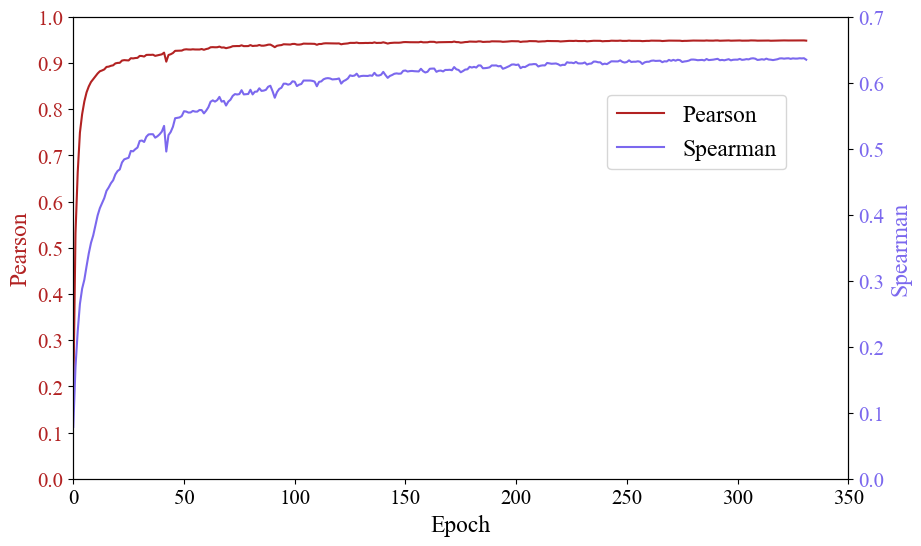

In [6]:
# Set the font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the loss with x-axis starting from 0
ax1.plot(epoch_steps, df_pearson[run_name + ' - pearson'], label='Pearson', color='firebrick')
ax1.set_xlabel('Epoch', fontsize=17)
ax1.set_ylabel('Pearson', color='firebrick', fontsize=17)
ax1.set_ylim(0, 1.0)  # Moved Pearson limits to primary axis
ax1.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ax1.tick_params(axis='y', labelcolor='firebrick', labelsize=15)

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(epoch_steps, df_spearman[run_name + ' - spearman'], label='Spearman', color='mediumslateblue')
ax2.set_ylabel('Spearman', color='mediumslateblue', fontsize=17)
ax2.set_ylim(0, 0.7)  # Moved Spearman limits to secondary axis
ax2.tick_params(axis='y', labelcolor='mediumslateblue', labelsize=15)

plt.xlim(left=0)
plt.xlim(right=350)

# x ticks size
ax1.tick_params(axis='x', labelsize=15)
ax2.tick_params(axis='x', labelsize=15)

# Add legends
fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.77), fontsize=17)

# Save the figure
plt.savefig('pearson_spearman.png', dpi=500, bbox_inches='tight')  # Save as a high-resolution image

# Show the plot
plt.show()